**Classification of birds to species with Convolutional Neural Network**

<u>This notebook documents 1. experiment conducted in 10th of April 2022</u>

Dataset I work with is: https://www.kaggle.com/datasets/gpiosenka/100-bird-species/. Check what Convolutional neural networks are all about at https://d2l.ai/chapter_convolutional-neural-networks/index.html before making changes to this notebook.

In [1]:
# import utilities
import os
import matplotlib.pyplot as plt # to evaluate model performance

import tensorflow as tf # import tensorflow
# work with Keras facade
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Dropout # input, output, hidden layers, activation...
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolutional layer and max pooling
from tensorflow.keras.layers import BatchNormalization

Training set consists of 58 388 RGB images (that means 3 channels), 224px x 224px. Validation set consists of 2000 images and test set consists of 2000 images. There are 356 unique bird species in a training dataset. There are 400 unique bird species in validation dataset and 400 bird species in test dataset too.

In [2]:
BASE_DIR = os.getcwd() # extract dataset from Kaggle to same folder as you have in this notebook

TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'testing')

In [3]:
TRAIN_CATEGORIES = os.listdir(TRAIN_DIR)
Train_Category_count = len(TRAIN_CATEGORIES) # gets you number of classes in training dataset

VAL_CATEGORIES = os.listdir(VALIDATION_DIR)
Val_Category_count = len(VAL_CATEGORIES)

TEST_CATEGORIES = os.listdir(TEST_DIR)
Test_Category_count = len(TEST_CATEGORIES)

Applying standard rescale factor by which all data values would be multiplied. We're doing this because we deal with images in RGB color model, where pixel values vary between 0 and 255. Such values would be too high for our model to process. This is why I rescale them to interval 0-1.

In [4]:
data_iterator = ImageDataGenerator(rescale=1./255,)

In [5]:
train_data = data_iterator.flow_from_directory(
    directory = TRAIN_DIR, 
    batch_size = 32, 
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224))

validation_data = data_iterator.flow_from_directory(
    directory = VALIDATION_DIR, 
    batch_size = 32,
    shuffle = True,
    class_mode="categorical",
    target_size=(224, 224))

test_data = data_iterator.flow_from_directory(
    directory = TEST_DIR,
    batch_size=32,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224))

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


**Architecture of this Convolutional Neural Network**

1. Convolutional layer - to extract patterns and abstract from low-level features of the images
2. Activation layer - activation functions with a same purpose as they have in Multilayer perceptrons. 
3. Pooling layer - optimization with Max pooling.
4. Normalization layer - batch normalization as optimization technique. Conducted after activation, before another convolution
5. Dense layer - fully connected layer of the MLP.

Input to this convolutional network are RGB images 224 x 224 px with 3 channels. First convolutional layer works with 3 channels, but this does not mean all convolutional layers have to work with these same 3 channels (they usually create activation maps with more channels).

Best practice is to use same activation function across all layers. Nobody knows what they will attribute to if they would be different. 

**Strategy of my Learning Process**

1. Setup, build and run my Convolutional Neural Network.
2. Check my model performance.
3. Conduct more experiments with probably different set of hyperparameters.

In [6]:
tf.keras.backend.clear_session()

IMAGE = load_img(os.getcwd() + "\\testing\\ABBOTTS BABBLER\\1.jpg")
IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape

model = tf.keras.models.Sequential()

# lowest convolutional layer for identification of the edges of birds
model.add(Conv2D(32, (3, 3), padding='same', input_shape=SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# convolutional layer to learn and store mid-level features of the bird species
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# highest convolutional layer to store complex information about the look of birds
model.add(Conv2D(32, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# and finally mlp
model.add(Flatten()) 
model.add(Dense(64, activation="relu")) 
model.add(Dense(Train_Category_count, activation="relu")) 

model.compile(optimizer = "adam",
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

EPOCHS = 10
BATCH_SIZE = 50 # set up such it enables us to apply batch normalization after activation

# stop if there is no big training progress towards good accuracy after 5 epochs
# stop training if the model cannot pass at least 0.5 accuracy after 5 epochs
earlyStopCallback = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=5, min_delta = 1, baseline=0.5)

history = model.fit(train_data, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data = validation_data, 
                    steps_per_epoch=len(train_data), validation_steps = len(validation_data), callbacks=[earlyStopCallback])

Epoch 1/10
1825/1825 [==============================] - 1006s 551ms/step - loss: 11.1798 - accuracy: 0.0031 - val_loss: 11.1400 - val_accuracy: 0.0025
Epoch 2/10
1825/1825 [==============================] - 1009s 553ms/step - loss: 11.0060 - accuracy: 0.0034 - val_loss: 11.1388 - val_accuracy: 0.0025
Epoch 3/10
1825/1825 [==============================] - 1015s 556ms/step - loss: 11.0043 - accuracy: 0.0038 - val_loss: 11.1368 - val_accuracy: 0.0025
Epoch 4/10
1825/1825 [==============================] - 969s 531ms/step - loss: 10.8939 - accuracy: 0.0039 - val_loss: 10.8145 - val_accuracy: 0.0025
Epoch 5/10
1825/1825 [==============================] - 961s 526ms/step - loss: 10.6174 - accuracy: 0.0039 - val_loss: 10.7665 - val_accuracy: 0.0025
Epoch 6/10
1825/1825 [==============================] - 1003s 550ms/step - loss: 10.6134 - accuracy: 0.0045 - val_loss: 10.7436 - val_accuracy: 0.0030
Epoch 7/10
1825/1825 [==============================] - 1005s 550ms/step - loss: 10.5504 - accur

**Model Evaluation**

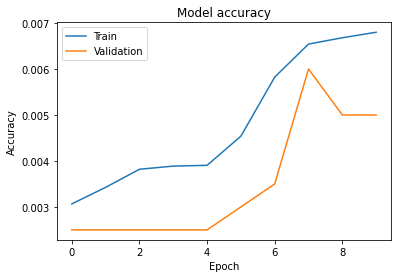

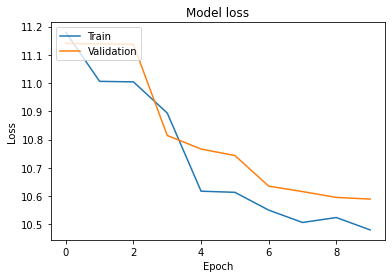

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()